# U.S. Medical Insurance Costs

The goal of this project will be to analyze a dataset containing patient information and gain insigth into potential use cases for the data, using Python fundamental methods. The dataset is contained in a **CSV** file and contains medical insurance costs, as well as other attributes from anonymous people across the U.S. The file can be downloaded from [kaggle](https://www.kaggle.com/datasets/mirichoi0218/insurance)

## Preparation
<hr>

### Import the data
As first step, we will import the data that is contained in the CSV file. As the file was previously investigated, it is known that it contains 7 columuns corresponding to _age_, _sex_, _bmi_, _children_, _smoker_, _region_ and _insurance_charges_ from 1338 anonymous people in the U.S.

In [1]:
import csv

ages = []
sex_count = []
bmis = []
number_of_children = []
smokers = []
regions = []
charges = []
#This last list will contain all records, cleaned
complete = []

with open('insurance.csv') as dataset:
    data = csv.DictReader(dataset)
    for i, item in enumerate(data):
        #Get an idea of each column by looking at the first 5 records
        if i < 5:
            print(item)
        
        age = int(item['age'])
        ages.append(age)
        
        sex_count.append(item['sex'])
        
        bmi = round(float(item['bmi']), 2)
        bmis.append(bmi)
        
        n_c = int(item['children'])
        number_of_children.append(n_c)
        
        smokers.append(item['smoker'])
        
        regions.append(item['region'])
        
        cost = round(float(item['charges']), 4)
        charges.append(cost)
        
        
        complete.append({
            'age': age,
            'sex': item['sex'],
            'bmi': bmi,
            'children': n_c,
            'smoker': item['smoker'],
            'region': item['region'],
            'charges': cost
        })
        
            

{'age': '19', 'sex': 'female', 'bmi': '27.9', 'children': '0', 'smoker': 'yes', 'region': 'southwest', 'charges': '16884.924'}
{'age': '18', 'sex': 'male', 'bmi': '33.77', 'children': '1', 'smoker': 'no', 'region': 'southeast', 'charges': '1725.5523'}
{'age': '28', 'sex': 'male', 'bmi': '33', 'children': '3', 'smoker': 'no', 'region': 'southeast', 'charges': '4449.462'}
{'age': '33', 'sex': 'male', 'bmi': '22.705', 'children': '0', 'smoker': 'no', 'region': 'northwest', 'charges': '21984.47061'}
{'age': '32', 'sex': 'male', 'bmi': '28.88', 'children': '0', 'smoker': 'no', 'region': 'northwest', 'charges': '3866.8552'}


### Declare helper functions
For the second step of the preparations, we will declare functions to help us yield statistical information about each column, which we will do in the next step of this project

In [2]:
from math import sqrt
from collections import Counter

def get_mean(lst):
    '''
    Calculates and returns the mean of a list of (numerical) values
    '''
    mean = sum(lst) / len(lst)
    return round(float(mean), 4)

def get_std_dev(lst):
    '''
    Calculates and returns the standard deviation of a population
    '''
    mean = get_mean(lst)
    sum_of_squares = sum([(x - mean)**2 for x in lst])
    std_dev = sqrt(sum_of_squares / (len(lst)) )
    return round(float(std_dev), 4)

def get_frequencies(lst):
    '''
    Returns a dictionary with the keys being the categories found in the list
    and the values being the frequencies of each category
    '''
    return Counter(lst)

def get_proportions(lst):
    '''
    Returns the percentage of each category relative to the total
    values that exist in the list
    '''
    frequencies = get_frequencies(lst)
    proportions = {}
    total = sum(frequencies.values())
    for key in frequencies.keys():
        proportions[key] = round(frequencies[key] / total, 4)
    return proportions

def print_frequencies(data, variable_name):
    '''
    Prints the frequency distribution as a table
    '''
    print(f'{variable_name:^15}{"Count":^15}')
    for category, count in data.items():
        print(f'{category:^15}{count:^15}')
        
def print_proportions(categories, variable_name):
    '''
    Prints a table containing all the categories in 'categories' as well
    as the percentage that each one represents of the whole.
    Assumes the data is generated by the 'get_proportions' function
    '''
    print(f'{variable_name:^15}{"Percentage":^15}')
    for category, percentage in categories.items():
        formated_p = str(round(percentage*100, 2))+'%'
        print(f'{category:^15}{formated_p:^15}')

For the get_standard_deviation function, the formula was taken from [Scribbr](https://www.scribbr.com/statistics/standard-deviation/), and is the following: <br>
$$
s = \sqrt{\frac{1}{N} \sum_{i=1}^N (x_i - \overline{x})^2}
$$


## Analyze each column
<hr>

### Age
Since Age is a numerical variable, we will be using the mean and standard deviation to describe this set

In [3]:
print(f'The minimum age is: {min(ages)}')
print(f'The maximum age is: {max(ages)}')
print(f'The average age is: {get_mean(ages)}')
print(f'The standard deviation of the ages is: {get_std_dev(ages)}')

The minimum age is: 18
The maximum age is: 64
The average age is: 39.207
The standard deviation of the ages is: 14.0447


Although the Age is numerical, common usage of this information groups similar ages into categories, so perhaps it is more useful for future analysis to think of age as a categorical variable, and use ranges to group similar ages into one category

In [4]:
ages_by_category = {
    '18-25': 0,
    '26-35': 0,
    '36-45': 0,
    '46-55': 0,
    '56-65': 0
}
for age in ages:
    if 18 <= age <= 25:
        ages_by_category['18-25'] += 1
    elif 26 <= age <= 35:
        ages_by_category['26-35'] += 1
    elif 36 <= age <= 45:
        ages_by_category['36-45'] += 1
    elif 46 <= age <= 55:
        ages_by_category['46-55'] += 1
    else:
        ages_by_category['56-65'] += 1  

This age ranges were selected to have aproximately the same span, which is hoped will result in an even distribution of the frequencies for each category. The following two tables will confirm is this distribution was achieved

In [5]:
print_frequencies(ages_by_category, 'Age')

      Age           Count     
     18-25           306      
     26-35           268      
     36-45           264      
     46-55           284      
     56-65           216      


In [6]:
print_proportions(get_proportions(ages_by_category), 'Age')

      Age        Percentage   
     18-25         22.87%     
     26-35         20.03%     
     36-45         19.73%     
     46-55         21.23%     
     56-65         16.14%     


The distribution is somewhat even, most of the categories represent around 20% of the total data, except for the older segment of the population, which is smaller than the rest.

### Sex
Since Sex is a categorical variable, we will tabulate the frequencies and percentages of each category to describe this variable

In [29]:
print_frequencies(get_frequencies(sex_count), 'Sex')

      Sex           Count     
    female           662      
     male            676      


In [8]:
print_proportions(get_proportions(sex_count), 'Sex')

      Sex        Percentage   
    female         49.48%     
     male          50.52%     


There is no entries for non-binary people in this dataset, so the only categories in this variable are _male_ and _female_, which are almost evenly distributed, with each one being close to half of the samples

### BMI
As happened with Age, BMI is a numerical variable that is frequently grouped into categories, so the BMI will be transformed into the groups proposed by the [CDC](https://www.cdc.gov/obesity/basics/adult-defining.html)


In [9]:
categorical_bmi = {
    'underweight': 0,
    'normal': 0,
    'overweight': 0,
    'obese': 0
}
for value in bmis:
    if value < 18.5:
        categorical_bmi['underweight'] += 1
    elif 18.5 <= value <= 24.9:
        categorical_bmi['normal'] += 1
    elif 25 <= value <= 29.9:
        categorical_bmi['overweight'] += 1
    else:
        categorical_bmi['obese'] += 1

In [10]:
print_frequencies(categorical_bmi, 'BMI')

      BMI           Count     
  underweight        20       
    normal           222      
  overweight         377      
     obese           719      


In [11]:
print_proportions(get_proportions(categorical_bmi), 'BMI')

      BMI        Percentage   
  underweight       1.49%     
    normal         16.59%     
  overweight       28.18%     
     obese         53.74%     


### Children
Refers to the number of children each person has

In [12]:
print(f'The minimum number of children is: {min(number_of_children)}')
print(f'The maximum number of children is: {max(number_of_children)}')
print(f'The average number of children is: {get_mean(number_of_children)}')
print(f'The standard deviation of the number of children is: {get_std_dev(number_of_children)}')

The minimum number of children is: 0
The maximum number of children is: 5
The average number of children is: 1.0949
The standard deviation of the number of children is: 1.205


Since there are few different values for this variable and all are integers, we can treat this as a categorical variable, and print the corresponding frequency and proportions table

In [13]:
print_frequencies(get_frequencies(number_of_children), 'Number of children')

Number of children     Count     
       0             574      
       1             324      
       3             157      
       2             240      
       5             18       
       4             25       


In [14]:
print_proportions(get_proportions(number_of_children), 'Number of children')

Number of children  Percentage   
       0            42.9%     
       1           24.22%     
       3           11.73%     
       2           17.94%     
       5            1.35%     
       4            1.87%     


Most of the people in this dataset have 1 or no children

### Smoker
Categorical variable that signals if a person smokes or not

In [15]:
print_frequencies(get_frequencies(smokers), 'Smokers')

    Smokers         Count     
      yes            274      
      no            1064      


In [16]:
print_proportions(get_proportions(smokers), 'Smokers')

    Smokers      Percentage   
      yes          20.48%     
      no           79.52%     


The majority of the people in the dataset are non-smokers

### Region
The dataset divides the people in four regions, which together cover the whole U.S. territory

In [17]:
print_frequencies(get_frequencies(regions), 'Regions')

    Regions         Count     
   southwest         325      
   southeast         364      
   northwest         325      
   northeast         324      


In [18]:
print_proportions(get_proportions(regions), 'Regions')

    Regions      Percentage   
   southwest       24.29%     
   southeast        27.2%     
   northwest       24.29%     
   northeast       24.22%     


There is an even distribution of the people sampled in each region

### Charges
This represents the cost of the insurance policy for each individual in the dataset

In [19]:
print(f'The minimum insurance cost is: {min(charges)}')
print(f'The maximum insurance cost is: {max(charges)}')
print(f'The average insurance cost is: {get_mean(charges)}')
print(f'The standard deviation of the insurance costs is: {get_std_dev(charges)}')

The minimum insurance cost is: 1121.8739
The maximum insurance cost is: 63770.428
The average insurance cost is: 13270.4223
The standard deviation of the insurance costs is: 12105.485


This results point to a possible skew to the right, because there are points to the right more than 4 standard deviations to the right of the mean. Plotting the distribution confirms this:

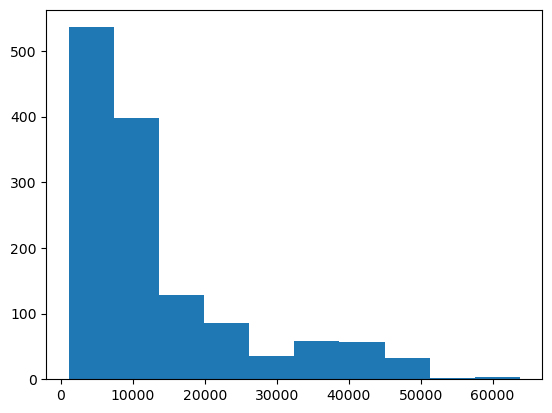

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(charges, bins = 10)
plt.show()

For the highest insurance costs, is there a single factor that predicts that the insurance will be more expensive?
First, the insurance costs are sorted from min to max

In [31]:
sorted_charges = sorted(complete, key = lambda x: x['charges'])

Then, the 10 more expensive insurance costs are presented:

In [36]:
for record in sorted_charges[-10:]:
    print(record)

{'age': 44, 'sex': 'female', 'bmi': 38.06, 'children': 0, 'smoker': 'yes', 'region': 'southeast', 'charges': 48885.1356}
{'age': 59, 'sex': 'male', 'bmi': 41.14, 'children': 1, 'smoker': 'yes', 'region': 'southeast', 'charges': 48970.2476}
{'age': 64, 'sex': 'male', 'bmi': 36.96, 'children': 2, 'smoker': 'yes', 'region': 'southeast', 'charges': 49577.6624}
{'age': 28, 'sex': 'male', 'bmi': 36.4, 'children': 1, 'smoker': 'yes', 'region': 'southwest', 'charges': 51194.5591}
{'age': 60, 'sex': 'male', 'bmi': 32.8, 'children': 0, 'smoker': 'yes', 'region': 'southwest', 'charges': 52590.8294}
{'age': 33, 'sex': 'female', 'bmi': 35.53, 'children': 0, 'smoker': 'yes', 'region': 'northwest', 'charges': 55135.4021}
{'age': 31, 'sex': 'female', 'bmi': 38.09, 'children': 1, 'smoker': 'yes', 'region': 'northeast', 'charges': 58571.0745}
{'age': 52, 'sex': 'male', 'bmi': 34.48, 'children': 3, 'smoker': 'yes', 'region': 'northwest', 'charges': 60021.399}
{'age': 45, 'sex': 'male', 'bmi': 30.36, 'chi

Smoker seems to be the single most important factor in determining a high insurance cost, since all of the most expensive insurance costs are from people that smoke, but further tests are needed to confirm this hypothesis

## Conclusion
<hr>

As exemplified by the Smoker variable, these patient attributes can contribute to low and/or high medical insurance charges. Further analysis is needed to determine which single variable, or combination of variables is the most strongly correlated to the insurance costs.